In [166]:
import numpy as np
import time
import matplotlib.pyplot as plt
np.random.seed(1)

In [167]:
def relu(x):
    return (x > 0) * x 

def relu_grad(x):
    return x > 0

# adding sigmoid and the derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    # return np.exp(-x) / (1 + np.exp(-x) ** 2)
    return sigmoid(x) * (1 - sigmoid(x))


In [168]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]])

In [169]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [170]:
X,y = streetlights, walk_vs_stop

In [171]:
hidden_nodes = 8

In [172]:
def train_model(activation, activation_grad, epochs, lr):
    ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5
    ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5

    error_list = [0]
    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

            #forward pass/prediction
            layer_1 = activation(layer_in.dot(ws_1))
            layer_out = layer_1.dot(ws_2)

            #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1]

            #calc the the error each node in prev layer contributed
            delta_1 = delta_2.dot(ws_2.T) * activation_grad(layer_1)

            #update weights
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))

        error = delta_2**2
        error_list.append(error[0][0])
    return error_list


## (1): Comparing the relu activation function and the sigmoid activation function

<function matplotlib.pyplot.show(close=None, block=None)>

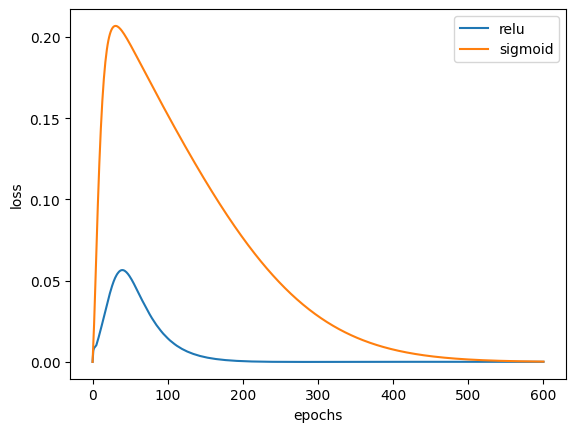

In [179]:
# we first train our model using relu and then using sigmoid, in both cases we have 600 epochs and a learning rate of 0.01
plt.plot(train_model(relu, relu_grad, epochs=600, lr=0.01), label='relu')
plt.plot(train_model(sigmoid, sigmoid_grad, epochs=600, lr=0.01), label='sigmoid')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show

When comparing the activation functions we can see that the relu function looks more effective, the peak of the loss is not as high as for the sigmoid function and the loss function converges to 0 way faster.


## (2): Comparing different learning rates

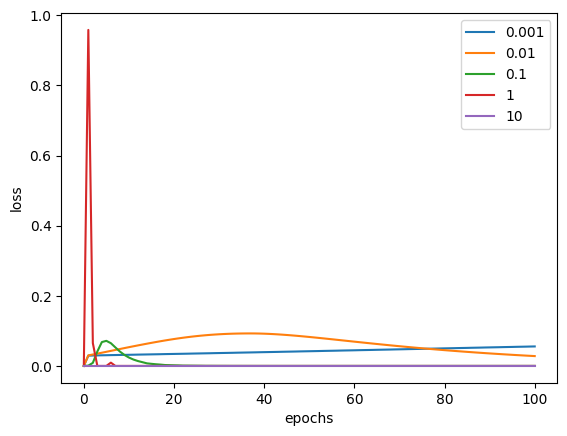

In [200]:
lr_list = [0.001, 0.01, 0.1, 1, 10]
lr_errors = []
for lr in lr_list:
    error=train_model(relu, relu_grad, epochs=100, lr=lr)
    error_list = []
    for i in range(10):
        error_list.append(error[10*(i+1)])
    lr_errors.append(error_list)
    plt.plot(error, label=lr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
    

In [175]:
for i in range(len(lr_list)):
    print("errors for lr {}: {} \n".format(lr_list[i], lr_errors[i]))
plt.show()

errors for lr 0.001: [0.018912083449693633, 0.011568351675461507, 0.006438432717403597, 0.003030474508460465, 0.000998123154336169, 9.166981795119827e-05, 8.928864805738594e-05, 0.0007465253985933304, 0.0019889091686288132, 0.0037593956915308482] 

errors for lr 0.01: [0.028355849332136748, 0.07693909274812863, 0.06308385612477378, 0.043060635300246265, 0.02790240992802632, 0.01766155001686788, 0.011083848343226472, 0.006932677143282622, 0.0043423208301204995, 0.0027372506754350296] 

errors for lr 0.1: [0.059226312677642015, 0.0005797524964173111, 2.2117156209913606e-08, 9.78662711035377e-06, 1.3787947416961281e-05, 1.4479156261998583e-05, 1.4190569962845068e-05, 1.3643338811852758e-05, 1.304637194640769e-05, 1.2458186279758517e-05] 

errors for lr 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 

errors for lr 10: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 



When comparing the learning rates we can see that the higher values 1 and 10 start to overfit immediatly while the lowest value, 0.001 seems to underfit - it is not making any progress to make any progress to a better trained model within 100 epochs. The values 0.1 and 0.01 look way more effective, they both start to converge to a low loss after some time. To me 0.01 looks the best since 0.1 might also result in overfitting.


## (3): Adding a second hidden layer

In [176]:
def train_model_2hidden_layers(activation, activation_grad, epochs, lr, hidden_nodes1, hidden_nodes2):
    ws_1 = np.random.rand(X.shape[1], hidden_nodes1) - 0.5
    ws_2 = np.random.rand(hidden_nodes1, hidden_nodes2) - 0.5
    ws_3 = np.random.rand(hidden_nodes2, y.shape[1]) - 0.5   # adding a third weight

    error_list = [0]
    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

            #forward pass/prediction
            layer_1 = activation(layer_in.dot(ws_1))
            layer_2 = activation(layer_1.dot(ws_2))  # adding a new layer between layer1 and the output layer
            layer_out = layer_2.dot(ws_3)

            #calc error/distance (how far are we from goal)
            delta_3 = layer_out - y[i:i+1]    # adding a new error for the new layer

            #calc the the error each node in prev layer contributed
            delta_2 = delta_3.dot(ws_3.T) * activation_grad(layer_2)
            delta_1 = delta_2.dot(ws_2.T) * activation_grad(layer_1)

            #update weights
            ws_3 -= lr * (layer_2.T.reshape(hidden_nodes2,1).dot(delta_3))  # updating the new weight
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes1,1).dot(delta_2))
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1))

        error = delta_3**2   # replacing the previous final error with the new final error from our new weights
        error_list.append(error[0][0])
    return error_list

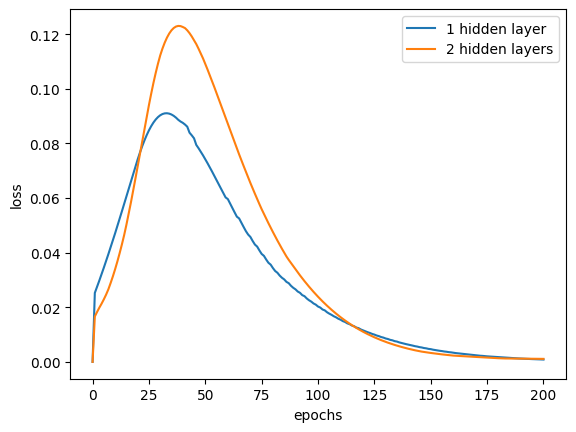

In [253]:
# running both models with relu as activation function, 200 epochs and a learning rate of 0.01.
# for the second model we keep 8 nodes for the first layer and add 16 nodes to the second
plt.plot(train_model(relu, relu_grad, epochs=200, lr=0.01), label='1 hidden layer')
plt.plot(train_model_2hidden_layers(relu, relu_grad, epochs=200, lr=0.01, hidden_nodes1=8, hidden_nodes2=16), label='2 hidden layers')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

After adding a second hidden layer I would have expected the model to be more effective but surprisingly this isn't the case. It seems that the second hidden layer even tends to risk more overfitting than the single one did.